# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.5017,  0.2685,  0.6622,  0.6944,  0.8299,  0.9941,  0.7512,  0.3263,  0.6134,  0.3507,
        0.7827,  0.9831,  0.0051,  0.0186,  0.6587,  0.8931,  0.3819,  0.4651,  0.1404,  0.9428,
        0.7787,  0.1233,  0.4007,  0.6458,  0.0444,  0.9336,  0.4054,  0.9604,  0.3049,  0.7666])

In [6]:
y

array([  9.5051,   8.8056,   9.9866,  10.0833,  10.4896,  10.9823,  10.2536,   8.979 ,   9.8402,
         9.052 ,  10.3482,  10.9492,   8.0153,   8.0557,   9.9761,  10.6793,   9.1458,   9.3953,
         8.4212,  10.8285,  10.3361,   8.3699,   9.202 ,   9.9375,   8.1331,  10.8008,   9.2163,
        10.8811,   8.9148,  10.2997])

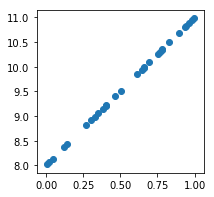

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.2976

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [14]:
?animation.FuncAnimation

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani